In [47]:
import matplotlib
import sympy as sp
import numpy
import math
import homogenous as h

theta_1 = sp.Symbol('theta_1')
theta_2 = sp.Symbol('theta_2')
phi= sp.Symbol('phi_0')

length_a = sp.Symbol('l_0-1')
length_b = sp.Symbol('l_1-2')
length_c = sp.Symbol('l_2-e')
theta_1
sp.Matrix([phi,theta_1,theta_2,length_a,length_b,length_c])

Matrix([
[  phi_0],
[theta_1],
[theta_2],
[  l_0-1],
[  l_1-2],
[  l_2-e]])

Two R robot triangle

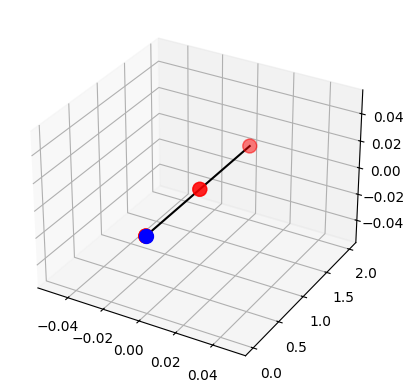

In [48]:
#robot start
import matplotlib.pyplot as plt

#robot links
#x, y, z = [1, 1.5, 2], [1, 2.4,4], [3.4, 1.4,5]
ln_1 = 1
ln_2 = 1

x = [0,0,0]
y = [0,ln_1,ln_1+ln_2]
z = [0,0,0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='red', s=100)
ax.scatter(x, y, z, c='red', s=100)

ax.scatter(x[0], y[0], z[0], c='blue', s=100)

ax.plot(x, y, z, color='black')
plt.show()



calculate fwd kinematics

In [49]:
fk_mat = h.Rot_x(theta_1)*h.trans_y(length_b)*h.Rot_x(theta_2)*h.trans_y(length_c)
sp.simplify(fk_mat)

Matrix([
[1,                      0,                       0,                                                 0],
[0, cos(theta_1 + theta_2), -sin(theta_1 + theta_2), l_1-2*cos(theta_1) + l_2-e*cos(theta_1 + theta_2)],
[0, sin(theta_1 + theta_2),  cos(theta_1 + theta_2), l_1-2*sin(theta_1) + l_2-e*sin(theta_1 + theta_2)],
[0,                      0,                       0,                                                 1]])

In [50]:
y = sp.Symbol('Y')
z = sp.Symbol('Z')

beta = sp.acos((length_b**2 + length_c**2 - y**2 - z**2)/(2*length_b*length_c))
alpha = sp.acos((y**2 + z**2 + length_b**2-length_c)/(2*length_b*sp.sqrt(y**2 + z**2)))
gamma = sp.atan2(z,y)
#theta_1_out =  
theta_1_solve_L = gamma - alpha
theta_2_solve_L = math.pi - beta

theta_1_solve_R = gamma + alpha
theta_2_solve_R = math.pi + beta

ik_mat = sp.Matrix([theta_1_solve_R,theta_2_solve_R])
ik_mat

Matrix([
[acos((Y**2 + Z**2 + l_1-2**2 - l_2-e)/(2*l_1-2*sqrt(Y**2 + Z**2))) + atan2(Z, Y)],
[   acos((-Y**2 - Z**2 + l_1-2**2 + l_2-e**2)/(2*l_1-2*l_2-e)) + 3.14159265358979]])

Solve with number

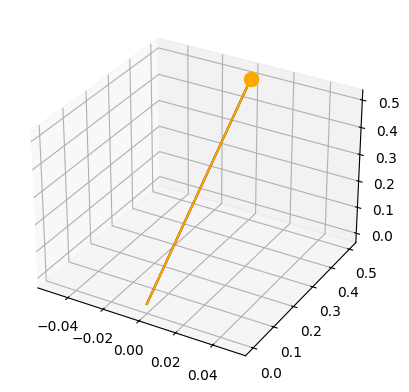

Matrix([
[1,                  0,                 0,   0],
[0,  0.911437827766147, 0.411437827766148, 0.5],
[0, -0.411437827766148, 0.911437827766147, 0.5],
[0,                  0,                 0,   1]])

In [63]:
x_targ = [0,0]
z_targ = [0,.5]
y_targ = [0,.5]

length_val_b = ln_1
length_val_c = ln_2

#show goal
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_targ[1], y_targ[1], z_targ[1], c='yellow', s=100)
ax.plot(x_targ, y_targ, z_targ, color='black')

ik_solved = ik_mat.subs({
    y:y_targ[1],
    z:z_targ[1],
    length_b:length_val_b,
    length_c: length_val_c
})

theta_1_solved = ik_solved[0]
theta_2_solved = ik_solved[1]

fk_solved = fk_mat.subs({
    theta_1:theta_1_solved,
    theta_2:theta_2_solved,
    length_b:length_val_b,
    length_c: length_val_c
})

x_real = [0,fk_solved[0,3]]
y_real = [0,fk_solved[1,3]]
z_real = [0,fk_solved[2,3]]
#show goal
ax.scatter(x_real[1], y_real[1], z_real[1], c='orange', s=100)
ax.plot(x_real, y_real, z_real, color='orange')

plt.show()
fk_solved


FK for each joint


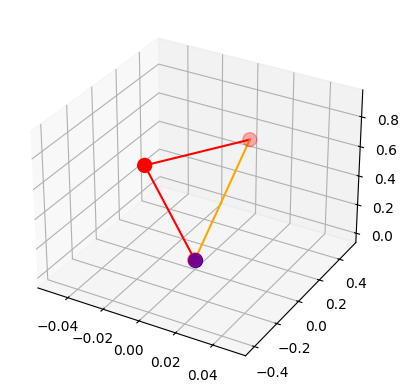

In [80]:
fk_mat_joint_1 = h.Rot_x(theta_1)*h.trans_y(length_b)
fk_mat_joint_1_solved = fk_mat_joint_1.subs({
    theta_1:theta_1_solved,
    theta_2:theta_2_solved,
    length_b:length_val_b,
    length_c: length_val_c
})
fk_mat_joint_2= fk_mat_joint_1*h.Rot_x(theta_2)*h.trans_y(length_c)
fk_mat_joint_2_solved = fk_mat_joint_2.subs({
    theta_1:theta_1_solved,
    theta_2:theta_2_solved,
    length_b:length_val_b,
    length_c: length_val_c
})
fk_mat_joint_2_solved

x_fk = [0,fk_mat_joint_1_solved[0,3],fk_mat_joint_2_solved[0,3]]
y_fk = [0,fk_mat_joint_1_solved[1,3],fk_mat_joint_2_solved[1,3]]
z_fk = [0,fk_mat_joint_1_solved[2,3],fk_mat_joint_2_solved[2,3]]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_fk, y_fk, z_fk, c='red', s=100)
ax.plot(x_fk, y_fk, z_fk, color='red')
ax.scatter(x_fk[0], y_fk[0],z_fk[0], c='blue', s=100)
ax.plot(x_targ, y_targ, z_targ, color='orange')
plt.show()
